In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df = pd.read_csv(url, names=columns, sep=", ", engine="python")

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape


(32561, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df["income"].value_counts()


,count
income,
<=50K,24720
>50K,7841


In [ ]:
(df == "?").sum()


,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df_clean = df[~df.isin(["?"]).any(axis=1)]


In [ ]:
df_clean.shape


(30162, 15)

In [ ]:
(df_clean == "?").sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
X = df_clean.drop("income", axis=1)
y = df_clean["income"]


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
X_encoded.shape


(30162, 96)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_lr = model_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8402121664180342
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4531
        >50K       0.73      0.57      0.64      1502

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=3000))
])

pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=3000))])

In [ ]:
y_pred = pipeline_lr.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8473396320238687
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4531
        >50K       0.73      0.61      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

results = []


In [ ]:
pipeline_lr_bal = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

pipeline_lr_bal.fit(X_train, y_train)

y_pred_lr_bal = pipeline_lr_bal.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr_bal)
f1_lr = f1_score(y_test, y_pred_lr_bal, pos_label=">50K")

results.append(("Logistic (balanced)", acc_lr, f1_lr))


In [ ]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8473396320238687
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4531
        >50K       0.73      0.61      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=">50K")

results.append(("Random Forest", acc_rf, f1_rf))


In [ ]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8473396320238687
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4531
        >50K       0.73      0.61      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, pos_label=">50K")

results.append(("Gradient Boosting", acc_gb, f1_gb))


In [ ]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8473396320238687
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4531
        >50K       0.73      0.61      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "F1 (>50K)"]
)

results_df


,Model,Accuracy,F1 (>50K)
0,Logistic (balanced),0.805238,0.678698
1,Random Forest,0.848003,0.670736
2,Random Forest,0.848003,0.670736
3,Gradient Boosting,0.859440,0.680723


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": gb.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by="importance",
    ascending=False
)

feature_importance.head(15)


,feature,importance
28,marital-status_Married-civ-spouse,0.382098
3,capital-gain,0.203427
2,education-num,0.196574
0,age,0.063667
4,capital-loss,0.059811
5,hours-per-week,0.034874
35,occupation_Exec-managerial,0.015823
41,occupation_Prof-specialty,0.006519
36,occupation_Farming-fishing,0.006348
39,occupation_Other-service,0.005990


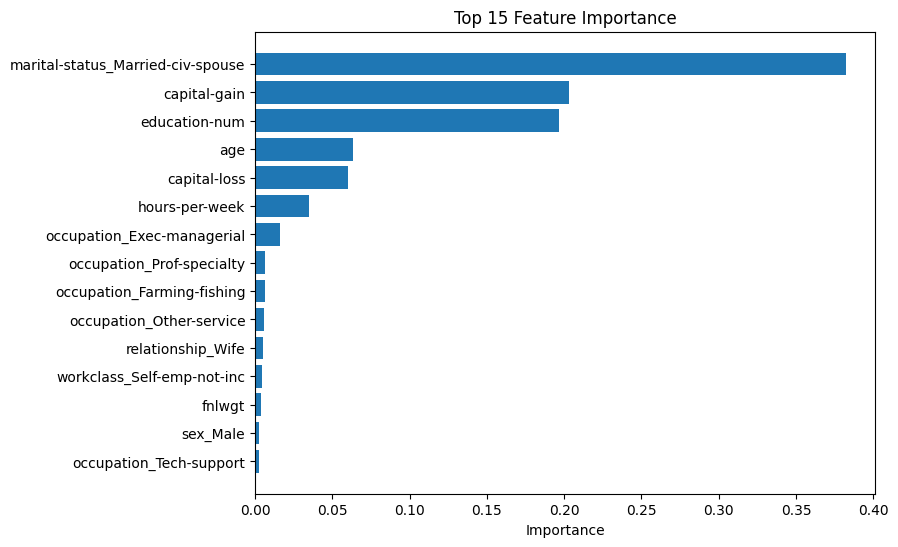

In [ ]:
import matplotlib.pyplot as plt

top_features = feature_importance.head(15)

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importance")
plt.xlabel("Importance")
plt.show()


In [ ]:
X_no_cap = X_encoded.drop(
    columns=["capital-gain", "capital-loss"]
)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_cap,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
gb2 = GradientBoostingClassifier(random_state=42)
gb2.fit(X_train2, y_train2)

y_pred2 = gb2.predict(X_test2)

from sklearn.metrics import accuracy_score, f1_score

print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("F1 (>50K):", f1_score(y_test2, y_pred2, pos_label=">50K"))


Accuracy: 0.8373943311785181
F1 (>50K): 0.6368011847463902


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "min_samples_leaf": [1, 3],
    "subsample": [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(
    gb,
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [ ]:
grid.best_params_


{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [ ]:
best_gb = grid.best_estimator_

y_pred_best = best_gb.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("F1 (>50K):", f1_score(y_test, y_pred_best, pos_label=">50K"))


Accuracy: 0.8529753025029008
F1 (>50K): 0.6558013193636011


In [ ]:
y_proba = best_gb.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test.map({">50K": 1, "<=50K": 0}), y_proba)


np.float64(0.9100276362187282)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.2, 0.8, 0.05)

for t in thresholds:
    y_pred_thr = (y_proba >= t).astype(int)
    f1 = f1_score(y_test.map({">50K": 1, "<=50K": 0}), y_pred_thr)
    print(f"Threshold={t:.2f}, F1={f1:.3f}")


Threshold=0.20, F1=0.674
Threshold=0.25, F1=0.690
Threshold=0.30, F1=0.701
Threshold=0.35, F1=0.704
Threshold=0.40, F1=0.693
Threshold=0.45, F1=0.674
Threshold=0.50, F1=0.656
Threshold=0.55, F1=0.643
Threshold=0.60, F1=0.625
Threshold=0.65, F1=0.595
Threshold=0.70, F1=0.550
Threshold=0.75, F1=0.489
Threshold=0.80, F1=0.420
